In [1]:
import seaborn as sns  
import pandas as pd  
import matplotlib.pyplot as plt 

# To make a plot of time series, I want to get the mean steps per day over all participants, need only data from steps.csv
# data pre-processing steps,get the head() of the resulting data frame

df1 = pd.read_csv('steps.csv',sep = ';') 
df1.head() 


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# to get mean steps, I need to remove "id"  
df_steps = df1.drop("id",axis=1)
df_mean_steps = df_steps.mean(axis = 0)

print(df_mean_steps)

20-6-2013     3642.416667
21-6-2013     9034.724280
22-6-2013    10889.636691
23-6-2013     7402.847973
24-6-2013     8110.370056
                 ...     
9-5-2014      9570.690141
10-5-2014     7614.848837
11-5-2014     6805.925926
12-5-2014     7505.530303
13-5-2014             NaN
Length: 328, dtype: float64


In [60]:
# Output from above has no column name.To make the line plot, I need dataframe with named columns
# so I make a new dataframe, give columns names.

date = pd.to_datetime(df_mean_steps.index,format='%d-%m-%Y')
mean_steps = pd.DataFrame({'date':date,'steps':df_mean_steps})
print(mean_steps) 

                date         steps
20-6-2013 2013-06-20   3642.416667
21-6-2013 2013-06-21   9034.724280
22-6-2013 2013-06-22  10889.636691
23-6-2013 2013-06-23   7402.847973
24-6-2013 2013-06-24   8110.370056
...              ...           ...
9-5-2014  2014-05-09   9570.690141
10-5-2014 2014-05-10   7614.848837
11-5-2014 2014-05-11   6805.925926
12-5-2014 2014-05-12   7505.530303
13-5-2014 2014-05-13           NaN

[328 rows x 2 columns]


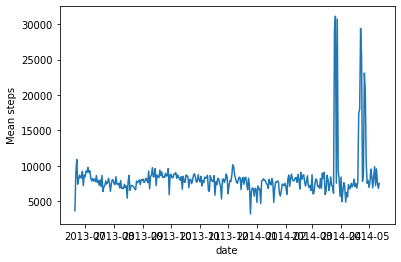

In [59]:
# A plot of a time series of mean steps per day over all participants
sns.lineplot(data=mean_steps, x="date", y="steps")
 

The median of mean steps per day is: 7856.073033707865 
The mean of mean steps per day is: 8202.974536861735 
The variance of mean steps per day is: 9783902.178617556 


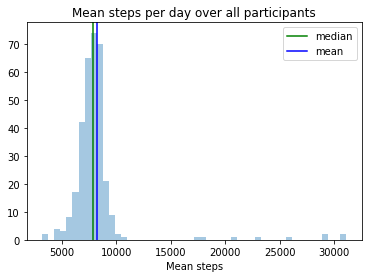

In [61]:
# An analysis of mean steps per day over all participants : 
# Make a histogram, show the median, mean and variance value.

mean_steps['steps'].name = 'Mean steps' #Labeling the variable for plotting
steps_per_day = mean_steps['steps'].dropna() #drop the NA's 

median_mean_steps = mean_steps['steps'].median()
mean_mean_steps = mean_steps['steps'].mean()
variance_mean_steps = mean_steps['steps'].var()
print(f'The median of mean steps per day is: {median_mean_steps} ') 
print(f'The mean of mean steps per day is: {mean_mean_steps} ') 
print(f'The variance of mean steps per day is: {variance_mean_steps} ') 

sns.distplot(steps_per_day, kde=False) 
plt.title('Mean steps per day over all participants')

# Adds a vertical line at x-position median_size and x-position mean_size, from y = 0 to y = 100 
plt.axvline(median_mean_steps, 0, 100, color='green', label='median') 
plt.axvline(mean_mean_steps, 0, 100, color='blue', label='mean')   
plt.legend() #This adds a legend. 
plt.show()


In [62]:
# the mean steps value for all people over 20000 sounds not reasonable, I also remove them for reference.
#print(mean_steps.sort_values(by='steps', ascending=False))

mean_steps['steps'] = mean_steps['steps'].apply(pd.to_numeric, errors='coerce')
# create a function to remove the unreasonable value,then apply to the entire column
def check_steps(x):
    if(x > 20000): 
        return float('NaN')
    else: 
        return x
mean_steps['steps'] = mean_steps['steps'].apply(check_steps)
print(mean_steps.sort_values(by='steps', ascending=False))

                date         steps
21-4-2014 2014-04-21  17984.571429
20-4-2014 2014-04-20  17426.741935
22-6-2013 2013-06-22  10889.636691
28-4-2014 2014-04-28  10358.786885
6-12-2013 2013-12-06  10148.326923
...              ...           ...
22-4-2014 2014-04-22           NaN
23-4-2014 2014-04-23           NaN
26-4-2014 2014-04-26           NaN
27-4-2014 2014-04-27           NaN
13-5-2014 2014-05-13           NaN

[328 rows x 2 columns]


The median of mean steps per day is: 7820.466252125851 
The mean of mean steps per day is: 7789.1864299503895 
The variance of mean steps per day is: 1671596.9416203967 


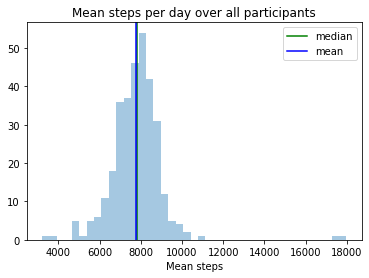

In [63]:
# Make a histogram with new data, show the median, mean and variance value.

mean_steps['steps'].name = 'Mean steps' #Labeling the variable for plotting
steps_per_day = mean_steps['steps'].dropna() #drop the NA's 

median_mean_steps = mean_steps['steps'].median()
mean_mean_steps = mean_steps['steps'].mean()
variance_mean_steps = mean_steps['steps'].var()
print(f'The median of mean steps per day is: {median_mean_steps} ') 
print(f'The mean of mean steps per day is: {mean_mean_steps} ') 
print(f'The variance of mean steps per day is: {variance_mean_steps} ') 

sns.distplot(steps_per_day, kde=False) 
plt.title('Mean steps per day over all participants')

# Adds a vertical line at x-position median_size and x-position mean_size, from y = 0 to y = 100 
plt.axvline(median_mean_steps, 0, 100, color='green', label='median') 
plt.axvline(mean_mean_steps, 0, 100, color='blue', label='mean')   
plt.legend() #This adds a legend. 
plt.show()

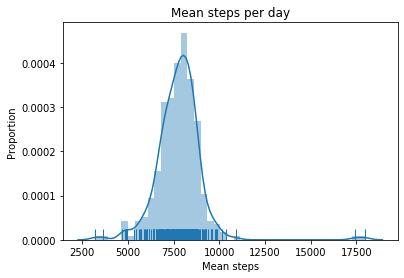

In [64]:
# Make a density plot, it "smoothes" the distribution and provides a model of the underlying distribution of mean steps.
# Add ticks at the actual values by using rug=True. 

sns.distplot(steps_per_day, rug=True)
plt.title('Mean steps per day')
plt.xlabel('Mean steps')
plt.ylabel('Proportion')
plt.show()

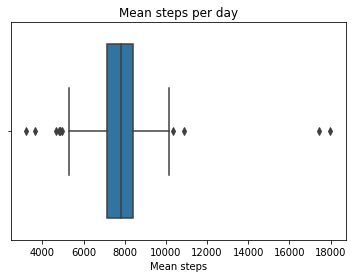

In [65]:
# Make a boxplot for the mean steps
# We can see some outliers lie far outside the trend,mean steps per day of 929 people over 25000 sounds not reasonable,may be fault data.
 
sns.boxplot(mean_steps['steps'])
plt.title('Mean steps per day')
plt.xlabel('Mean steps')
plt.show()

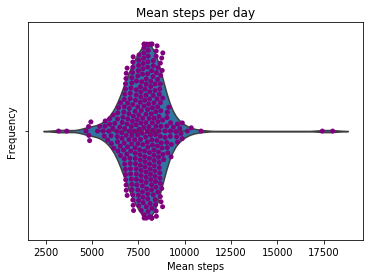

In [66]:
# Make a violin plot,it is a combination of a density plot and a boxplot
mean_steps = mean_steps[mean_steps['steps'] > 0]
sns.violinplot(mean_steps['steps'])
sns.swarmplot(mean_steps['steps'], color='purple') 
plt.title('Mean steps per day')
plt.ylabel('Frequency')
plt.xlabel('Mean steps')
plt.show()

Verbal description of the distribution: normality, skewness, outliers, etc

From above histogram,density plot,boxplot and violin plot,
The median of mean steps per day is: 7820.466252125851 
The mean of mean steps per day is: 7789.1864299503895 
mean value < median value, it's Left skewed，skewness < 0. 

The variance of mean steps per day is: 1671598.9416203967 

There are some outliers lie far outside the trend,may be faulty data.
Besides the outliers, we can see the data are near normally distributed.
  
